<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.783054,89.332242,0.074026,131.189322,131.131366,0.057956
1,0.0,1.0,36.971735,40.855546,0.391811,88.219093,87.844664,0.374428
2,0.0,2.0,87.154125,70.314337,-0.374186,167.094276,167.541418,-0.447142
3,0.0,3.0,49.252260,87.965481,0.697101,147.914841,147.252157,0.662685
4,0.0,4.0,45.349418,77.303192,-0.177102,132.475508,132.681983,-0.206475
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.861552,98.427700,-0.050110,148.239143,148.208615,0.030528
249996,999.0,246.0,72.082506,26.033365,0.116285,108.232156,108.102778,0.129378
249997,999.0,247.0,25.563387,68.898136,0.351101,104.812625,104.392857,0.419768
249998,999.0,248.0,70.302517,61.236880,0.355277,141.894673,141.501344,0.393330


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    31.783054  89.332242  0.074026  131.189322  131.131366  0.057956
      1.0    36.971735  40.855546  0.391811   88.219093   87.844664  0.374428
      2.0    87.154125  70.314337 -0.374186  167.094276  167.541418 -0.447142
      3.0    49.252260  87.965481  0.697101  147.914841  147.252157  0.662685
      4.0    45.349418  77.303192 -0.177102  132.475508  132.681983 -0.206475
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.861552  98.427700 -0.050110  148.239143  148.208615  0.030528
      246.0  72.082506  26.033365  0.116285  108.232156  108.102778  0.129378
      247.0  25.563387  68.898136  0.351101  104.812625  104.392857  0.419768
      248.0  70.302517  61.236880  0.355277  141.894673  141.501344  0.393330
      249.0  85.431824  32.917089 -0.285736  128.063176  128.338716 -0.275540

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    31.783054  89.332242  0.074026  131.189322  131.131366  0.057956
      1.0    36.971735  40.855546  0.391811   88.219093   87.844664  0.374428
      2.0    87.154125  70.314337 -0.374186  167.094276  167.541418 -0.447142
      3.0    49.252260  87.965481  0.697101  147.914841  147.252157  0.662685
      4.0    45.349418  77.303192 -0.177102  132.475508  132.681983 -0.206475
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.861552  98.427700 -0.050110  148.239143  148.208615  0.030528
      246.0  72.082506  26.033365  0.116285  108.232156  108.102778  0.129378
      247.0  25.563387  68.898136  0.351101  104.812625  104.392857  0.419768
      248.0  70.302517  61.236880  0.355277  141.894673  141.501344  0.393330
      249.0  85.431824  32.917089 -0.285736  128.063176  128.338716 -0.275540

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.783054,89.332242,0.074026,131.189322,131.131366,0.057956
1,0.0,1.0,36.971735,40.855546,0.391811,88.219093,87.844664,0.374428
2,0.0,2.0,87.154125,70.314337,-0.374186,167.094276,167.541418,-0.447142
3,0.0,3.0,49.252260,87.965481,0.697101,147.914841,147.252157,0.662685
4,0.0,4.0,45.349418,77.303192,-0.177102,132.475508,132.681983,-0.206475
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.861552,98.427700,-0.050110,148.239143,148.208615,0.030528
249996,999.0,246.0,72.082506,26.033365,0.116285,108.232156,108.102778,0.129378
249997,999.0,247.0,25.563387,68.898136,0.351101,104.812625,104.392857,0.419768
249998,999.0,248.0,70.302517,61.236880,0.355277,141.894673,141.501344,0.393330


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    31.783054  89.332242  0.074026  131.189322  131.131366  0.057956
      1.0    36.971735  40.855546  0.391811   88.219093   87.844664  0.374428
      2.0    87.154125  70.314337 -0.374186  167.094276  167.541418 -0.447142
      3.0    49.252260  87.965481  0.697101  147.914841  147.252157  0.662685
      4.0    45.349418  77.303192 -0.177102  132.475508  132.681983 -0.206475
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.861552  98.427700 -0.050110  148.239143  148.208615  0.030528
      246.0  72.082506  26.033365  0.116285  108.232156  108.102778  0.129378
      247.0  25.563387  68.898136  0.351101  104.812625  104.392857  0.419768
      248.0  70.302517  61.236880  0.355277  141.894673  141.501344  0.393330
      249.0  85.431824  32.917089 -0.285736  128.063176  128.338716 -0.275540

[250000 rows x 6 columns]

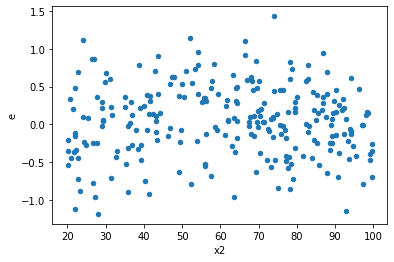

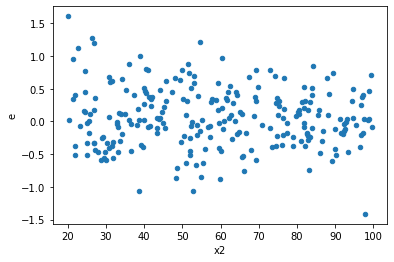

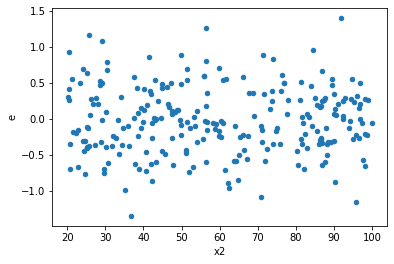

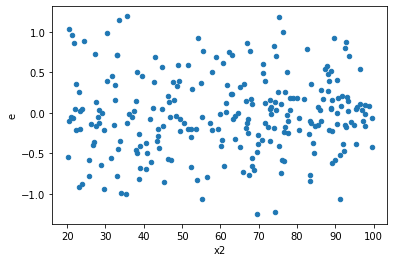

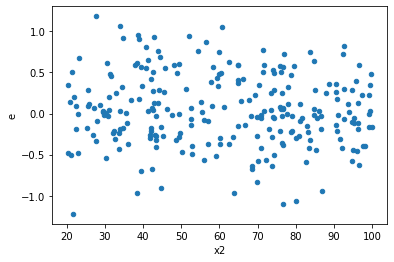

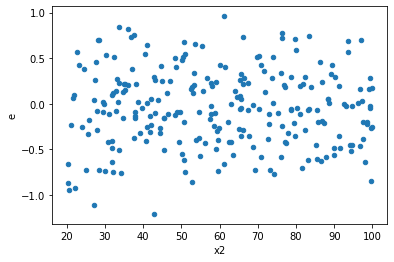

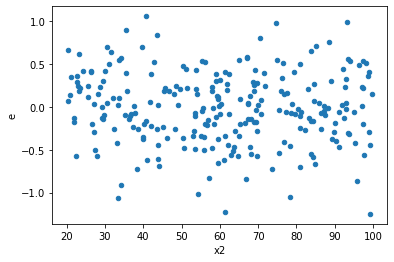

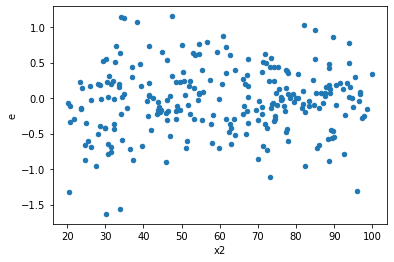

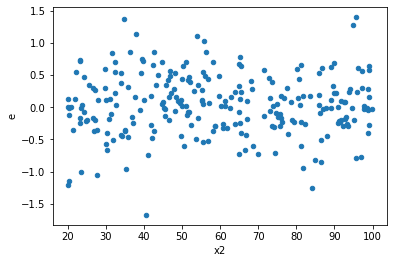

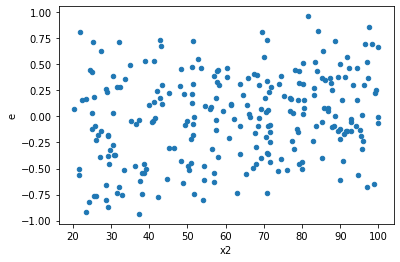

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,130.0,116.0,26.068590540744545,31.790515578430963,0.2005276195441888,0.2740561687795773,1.3666754205855696,0.08653693868220214,0.9567315306588989,0.04326846934110107,Reject001=1 : Homoscedasticity
4.0,110.0,136.0,20.067743900881393,26.944871153250517,0.18243403546255813,0.19812405259743027,1.0860037826554152,0.6447892564065798,0.6776053717967101,0.3223946282032899,Reject001=1 : Homoscedasticity
10.0,117.0,129.0,17.60401940632034,22.069298376733023,0.1504617043275243,0.17107983237777538,1.1370323973292875,0.4756747723175745,0.7621626138412128,0.23783738615878725,Reject001=1 : Homoscedasticity
14.0,131.0,115.0,26.05752301650059,26.38419758395131,0.1989123894389358,0.22942780507783747,1.1534113371468477,0.43380868275580586,0.7830956586220971,0.21690434137790293,Reject001=1 : Homoscedasticity
15.0,144.0,102.0,26.658840357549973,20.87538335984799,0.18513083581631926,0.2046606211749803,1.1054918013660233,0.5928223438474451,0.7035888280762774,0.29641117192372257,Reject001=1 : Homoscedasticity
17.0,118.0,128.0,23.16437104537496,31.84398478214182,0.19630822919809288,0.24878113111048297,1.2672985341813672,0.18922533761526994,0.905387331192365,0.09461266880763497,Reject001=1 : Homoscedasticity
19.0,141.0,105.0,24.904919160116545,21.30148392495877,0.1766306323412521,0.2028712754757978,1.1485622441969665,0.45536093453843174,0.7723195327307841,0.22768046726921587,Reject001=1 : Homoscedasticity
21.0,112.0,134.0,15.442327844967364,31.440933073235822,0.13787792718720862,0.23463382890474493,1.7017504809610502,0.0032625950128029046,0.9983687024935985,0.0016312975064014523,Reject001=0 : Heteroscedasticity
22.0,101.0,145.0,15.662235934917186,38.0503494789658,0.15507164291997214,0.2624162033032124,1.6922255956147805,0.003684732307719596,0.9981576338461402,0.001842366153859798,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,122.0,30.69173085463301,21.140822632356105,0.24751395850510494,0.17328543141275496,0.7001036727760183,0.04892859518984905,Reject001=1 : Homoscedasticity
1.0,119.0,127.0,27.265991416237622,23.752005234121636,0.2291259782877111,0.18702366326080028,0.816248182150505,0.2631976240020849,Reject001=1 : Homoscedasticity
2.0,112.0,134.0,26.057787629962053,27.086874923279172,0.2326588181246612,0.20214085763641174,0.8688295559384404,0.4426847788008851,Reject001=1 : Homoscedasticity
3.0,130.0,116.0,26.068590540744545,31.790515578430963,0.2005276195441888,0.2740561687795773,1.3666754205855696,0.08653693868220214,Reject001=1 : Homoscedasticity
4.0,110.0,136.0,20.067743900881393,26.944871153250517,0.18243403546255813,0.19812405259743027,1.0860037826554152,0.6447892564065798,Reject001=1 : Homoscedasticity
5.0,113.0,133.0,20.45204924320779,23.140590184859228,0.1809915862230778,0.1739893998861596,0.9613120892355307,0.8316434885774605,Reject001=1 : Homoscedasticity
6.0,139.0,107.0,24.535672603754616,17.8184353766315,0.17651563024283898,0.1665274334264626,0.9434146607717669,0.7429977265860308,Reject001=1 : Homoscedasticity
7.0,120.0,126.0,30.739607113556904,24.215859582311868,0.2561633926129742,0.1921893617643799,0.7502608386154153,0.11328177724464529,Reject001=1 : Homoscedasticity
8.0,118.0,128.0,29.889708581706444,24.79347212279036,0.25330261509920715,0.19369900095929968,0.7646940434603747,0.13991655877507675,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      915
Reject001=0 : Heteroscedasticity     85
Name: Result_test, dtype: int64